In [1]:
#Code generated from Claude Sonnet 3.5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('SYRCityline_Requests_(2021-Present)_Cleaned.csv')

In [3]:
sentiment = pd.read_csv('sentimentResults.csv')

In [4]:
#adding the sentiment analysis columns to the dataframe
df['word_scores'] = sentiment['word_scores']
df['compound'] = sentiment['compound'] 
df['pos'] = sentiment['pos']
df['neu'] = sentiment['neu']
df['neg'] = sentiment['neg']

In [5]:
sentiment.head()

,ObjectId,Description,X,Y,Id,Summary,Rating,Address,Agency_Name,Request_type,...,Category,Sla_in_hours,Report_Source,word_scores,compound,pos,neu,neg,but_count,resolved
0,2,jet flush jerry 439 6961,-8.479295e+06,5.320378e+06,18214945.0,Other Sewer-related Concerns,1,"609 N Geddes St Syracuse, New York, 13204",Water & Sewage,33840,...,Other Sewer-related Concerns,24.0,Request Form,"{0, 0, 0, 0, 0}",0.000,0.00,1.000,0.000,0,0
1,4,damaged sign,-8.477781e+06,5.324004e+06,18214835.0,Traffic & Parking Signs,1,"406 Willumae Dr Syracuse NY 13208, United States",Streets & Transportation,34423,...,Traffic & Parking Signs,120.0,iPhone,"{-1.9, 0}",-0.440,0.00,0.256,0.744,0,0
2,5,cars parked illegally odd parking rules 300 bl...,-8.475632e+06,5.320393e+06,18214821.0,Report an illegally parked vehicle,1,"300-300 Green St Syracuse, NY, 13203, USA",Parking & Vehicles,33844,...,Report an illegally parked vehicle,72.0,Portal,"{0, 0, 0, -1.3, 0, 0, 0, -1.9, 0, 0, 0, 0, 0, ...",-0.796,0.00,0.616,0.384,0,0
3,6,dogs super skinny coming day day understanding...,-8.478003e+06,5.316387e+06,18214801.0,Animal Control,1,"511 Hudson St Syracuse NY 13207, United States",Animals,39575,...,Animal Control,24.0,iPhone,"{0, 2.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.599,0.17,0.830,0.000,0,0
4,9,wide pothole 81 north center lane highway meet...,-8.475911e+06,5.315017e+06,18214551.0,Report a Pothole,1,"8310 I-81 Syracuse, NY 13205, USA",Streets & Transportation,33843,...,Report a Pothole,120.0,Android,"{0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.1, 0, 0}",-0.477,0.00,0.819,0.181,0,0


In [6]:
df.head()

,Unnamed: 0,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,...,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId,word_scores,compound,pos,neu,neg
0,1,-8.472894e+06,5.319007e+06,18198655.0,Sewer Back-ups (INTERNAL),1,"435 Ellis St Syracuse, New York, 13210",Dina 450-3461,Water & Sewage,35820,...,Assistant Superintendent of Sewers,Sewer Back-ups (INTERNAL),24.0,Request Form,1,"{0, 0, 0, 0, 0}",0.000,0.00,1.000,0.000
1,2,-8.479295e+06,5.320378e+06,18214945.0,Other Sewer-related Concerns,1,"609 N Geddes St Syracuse, New York, 13204",Jet Flush- Jerry 439-6961,Water & Sewage,33840,...,Assistant Superintendent of Sewers,Other Sewer-related Concerns,24.0,Request Form,2,"{-1.9, 0}",-0.440,0.00,0.256,0.744
2,3,-8.476745e+06,5.313388e+06,18214845.0,Report Improperly Set Out Trash or Recycling (...,1,"3138 Midland Ave Syracuse NY 13205, United States",NaN,"Garbage, Recycling & Graffiti",34425,...,Public Works Inspector- SP,Report Improperly Set Out Trash or Recycling (...,72.0,iPhone,3,"{0, 0, 0, -1.3, 0, 0, 0, -1.9, 0, 0, 0, 0, 0, ...",-0.796,0.00,0.616,0.384
3,4,-8.477781e+06,5.324004e+06,18214835.0,Traffic & Parking Signs,1,"406 Willumae Dr Syracuse NY 13208, United States",Damaged sign down,Streets & Transportation,34423,...,Superintendent of Transportation,Traffic & Parking Signs,120.0,iPhone,4,"{0, 2.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.599,0.17,0.830,0.000
4,5,-8.475632e+06,5.320393e+06,18214821.0,Report an illegally parked vehicle,1,"300-300 Green St Syracuse, NY, 13203, USA",Cars parked illegally and not following odd ev...,Parking & Vehicles,33844,...,Syracuse Police Ordinance,Report an illegally parked vehicle,72.0,Portal,5,"{0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.1, 0, 0}",-0.477,0.00,0.819,0.181


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112858 entries, 0 to 112857
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              112858 non-null  int64  
 1   X                       112858 non-null  float64
 2   Y                       112858 non-null  float64
 3   Id                      112858 non-null  float64
 4   Summary                 112858 non-null  object 
 5   Rating                  112858 non-null  int64  
 6   Address                 112858 non-null  object 
 7   Description             97802 non-null   object 
 8   Agency_Name             112858 non-null  object 
 9   Request_type            112858 non-null  int64  
 10  Lat                     112858 non-null  float64
 11  Lng                     112858 non-null  float64
 12  Created_at_local        112858 non-null  object 
 13  Acknowledged_at_local   21844 non-null   object 
 14  Closed_at_local     

In [8]:
print(df['Assignee_name'].nunique())

106


In [9]:
# Define the text to replace and its replacement
old_text = "To report an illegally parked vehicle, please call the Syracuse Police Ordinance at 315-448-8650. If this is an emergency, please call 911. Do NOT submit requests to Cityline."
new_text = "Illegally Parked Vehicle"

# Replace the values in the Category column
df['Category'] = df['Category'].replace(old_text, new_text)

In [10]:
# Converting SLA to minutes
df['Sla_in_minutes'] = df['Sla_in_hours'] * 60

# Calculate which requests met/missed SLA
df['Met_Close_SLA'] = df['Minutes_to_Close'] <= df['Sla_in_minutes']
df['Met_Acknowledge_SLA'] = df['Minutes_to_Acknowledge'] <= df['Sla_in_minutes']

# Basic statistics of response times vs SLA
response_stats = pd.DataFrame({
    'Metric': ['Closure Time', 'Acknowledgment Time'],
    'Mean (minutes)': [df['Minutes_to_Close'].mean(), df['Minutes_to_Acknowledge'].mean()],
    'Median (minutes)': [df['Minutes_to_Close'].median(), df['Minutes_to_Acknowledge'].median()],
    'SLA Compliance Rate': [
        (df['Met_Close_SLA'].sum() / df['Met_Close_SLA'].count()) * 100,
        (df['Met_Acknowledge_SLA'].sum() / df['Met_Acknowledge_SLA'].count()) * 100
    ]
})

# Analysis by category
category_performance = df.groupby('Category').agg({
    'Met_Close_SLA': ['count', 'mean'],
    'Minutes_to_Close': 'mean',
    'Sla_in_minutes': 'mean'
}).round(2)


Worst 10 Categories Compliance Rates:
-----------------------------------
Report external dirt/debris blocking a Catch Basin/Storm Drain: 18.3%
Cart Stolen: 22.2%
Water-related Concerns: 22.5%
Animal Control: 25.3%
Report an Abandoned Vehicle: 25.3%
Overgrown Grass in Public Spaces: 26.0%
Report a Skipped Bulk Pick Up (Internal): 26.9%
Pavement Markings: 27.2%
Cart Broken: 28.1%
Report an illegally parked vehicle: 30.0%

Best 10 Categories Compliance Rates:
-----------------------------------
Request Construction Debris Pick Up (May and September Only): 97.3%
Report Overgrowth on Private land: 93.0%
Tires: 92.9%
Report Overgrown Grass on Private Land: 89.2%
Large or Bulk Items- Setout notification only: 86.6%
Home & Building Maintenance: 84.3%
Report Trash/Debris Outside a Home/Building: 81.2%
Graffiti on Private Land: 80.7%
Report Litter on Private Land: 79.6%
Report internal structural damage of a Catch Basin/Storm Drain: 78.1%


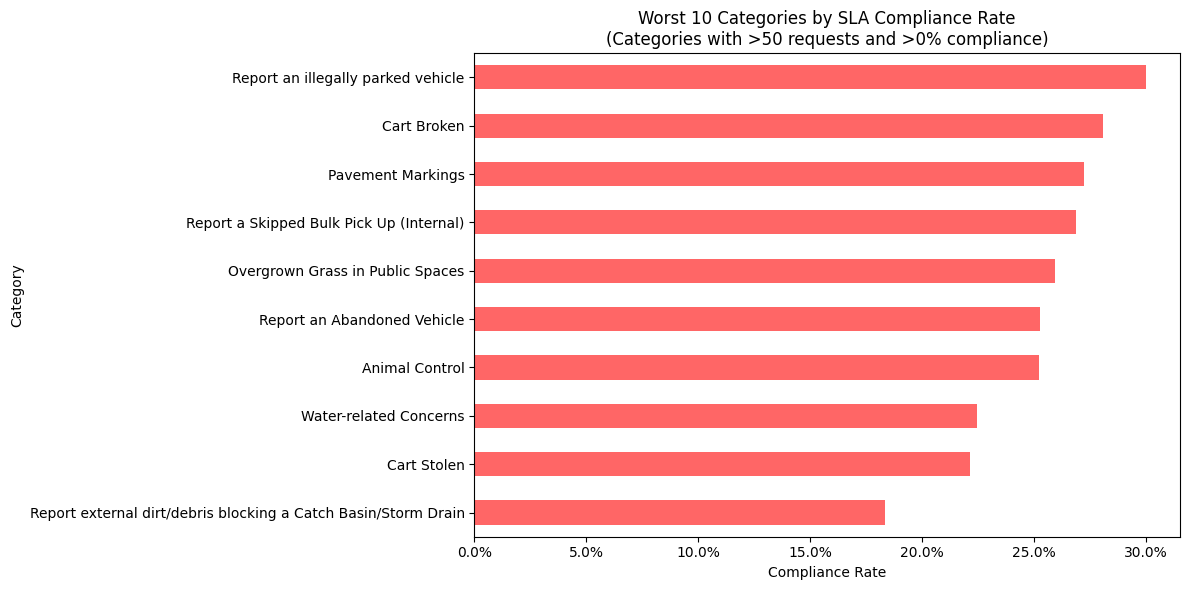

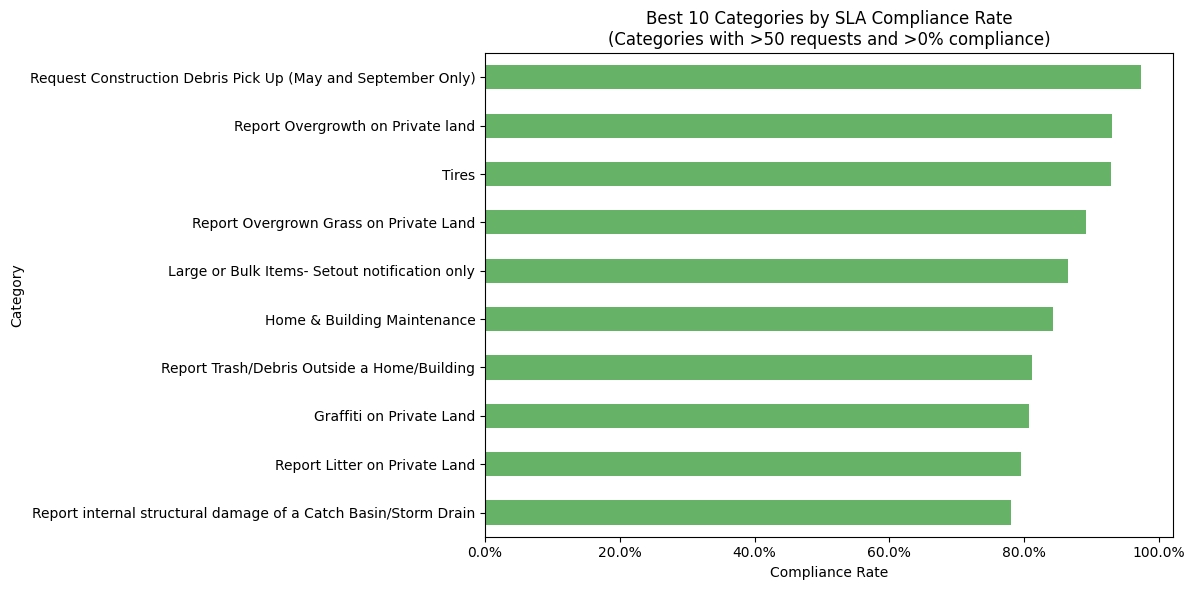

In [11]:
import os

# Get current working directory and create Compliance Analysis folder
current_dir = os.getcwd()
analysis_folder = os.path.join(current_dir, 'Compliance Analysis')

# Create the directory if it doesn't exist
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

# Filter categories with at least 50 requests and compliance rates > 0
significant_categories = df['Category'].value_counts()[df['Category'].value_counts() >= 50].index

# Calculate compliance rates for all categories
category_compliance = df[df['Category'].isin(significant_categories)].groupby('Category')['Met_Close_SLA'].mean()

# Filter for compliance rates > 0
valid_categories = category_compliance[category_compliance > 0].index

# Get both the 10 worst and best performing categories
worst_10_categories = df[df['Category'].isin(valid_categories)].groupby('Category')['Met_Close_SLA'].mean().sort_values().head(10).index
best_10_categories = df[df['Category'].isin(valid_categories)].groupby('Category')['Met_Close_SLA'].mean().sort_values(ascending=False).head(10).index

# Calculate SLA compliance for these categories
worst_sla_by_category = df[df['Category'].isin(worst_10_categories)].groupby('Category')['Met_Close_SLA'].mean().sort_values()
best_sla_by_category = df[df['Category'].isin(best_10_categories)].groupby('Category')['Met_Close_SLA'].mean().sort_values()  # Changed to ascending for plot

# Create first figure for worst performers
plt.figure(figsize=(12, 6))
worst_sla_by_category.plot(kind='barh', color='red', alpha=0.6)
plt.title('Worst 10 Categories by SLA Compliance Rate\n(Categories with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'worst_performers_categories.png'))

# Create second figure for best performers
plt.figure(figsize=(12, 6))
best_sla_by_category.plot(kind='barh', color='green', alpha=0.6)
plt.title('Best 10 Categories by SLA Compliance Rate\n(Categories with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'best_performers_categories.png'))

# Save text file with proper path
with open(os.path.join(analysis_folder, 'compliance_rates_categories.txt'), 'w') as f:
    f.write("Worst 10 Categories Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for category, rate in worst_sla_by_category.items():
        f.write(f"{category}: {rate:.1%}\n")
    
    f.write("\nBest 10 Categories Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for category, rate in reversed(list(best_sla_by_category.items())):  # Reverse the list to show highest first in text
        f.write(f"{category}: {rate:.1%}\n")

# Print the rates to console as well
print("\nWorst 10 Categories Compliance Rates:")
print("-" * 35)
for category, rate in worst_sla_by_category.items():
    print(f"{category}: {rate:.1%}")

print("\nBest 10 Categories Compliance Rates:")
print("-" * 35)
for category, rate in reversed(list(best_sla_by_category.items())):  # Reverse the list to show highest first in console
    print(f"{category}: {rate:.1%}")

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the specific folder path
analysis_folder = 'Compliance Analysis'
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

# Filter assignees with at least 50 requests and compliance rates > 0
significant_assignees = df['Assignee_name'].value_counts()[df['Assignee_name'].value_counts() >= 50].index

# Calculate compliance rates for all assignees
assignee_compliance = df[df['Assignee_name'].isin(significant_assignees)].groupby('Assignee_name')['Met_Close_SLA'].mean()

# Filter for compliance rates > 0
valid_assignees = assignee_compliance[assignee_compliance > 0].index

# Get both the 10 worst and best performing assignees
worst_10_assignees = df[df['Assignee_name'].isin(valid_assignees)].groupby('Assignee_name')['Met_Close_SLA'].mean().sort_values().head(10).index
best_10_assignees = df[df['Assignee_name'].isin(valid_assignees)].groupby('Assignee_name')['Met_Close_SLA'].mean().sort_values(ascending=False).head(10).index

# Calculate SLA compliance for these assignees
worst_sla_by_assignee = df[df['Assignee_name'].isin(worst_10_assignees)].groupby('Assignee_name')['Met_Close_SLA'].mean().sort_values()
best_sla_by_assignee = df[df['Assignee_name'].isin(best_10_assignees)].groupby('Assignee_name')['Met_Close_SLA'].mean().sort_values()

# Add request volume information
worst_request_volume = df[df['Assignee_name'].isin(worst_10_assignees)].groupby('Assignee_name').size()
best_request_volume = df[df['Assignee_name'].isin(best_10_assignees)].groupby('Assignee_name').size()

# Create first figure for worst performers
plt.figure(figsize=(12, 6))
ax = worst_sla_by_assignee.plot(kind='barh', color='red', alpha=0.6)
plt.title('Worst 10 Assignees by SLA Compliance Rate\n(Assignees with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))


plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'worst_performers_assignee.png'))
plt.close()

# Create second figure for best performers
plt.figure(figsize=(12, 6))
ax = best_sla_by_assignee.plot(kind='barh', color='green', alpha=0.6)
plt.title('Best 10 Assignees by SLA Compliance Rate\n(Assignees with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))


plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'best_performers_assignee.png'))
plt.close()

# Save text file with proper path
with open(os.path.join(analysis_folder, 'compliance_rates_assignee.txt'), 'w') as f:
    f.write("Worst 10 Assignees Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for assignee in worst_sla_by_assignee.index:
        rate = worst_sla_by_assignee[assignee]
        volume = worst_request_volume[assignee]
        f.write(f"{assignee}: {rate:.1%} ({volume} requests)\n")
    
    f.write("\nBest 10 Assignees Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for assignee in reversed(best_sla_by_assignee.index):
        rate = best_sla_by_assignee[assignee]
        volume = best_request_volume[assignee]
        f.write(f"{assignee}: {rate:.1%} ({volume} requests)\n")

# Print to console as well
print("\nWorst 10 Assignees Compliance Rates:")
for assignee in worst_sla_by_assignee.index:
    rate = worst_sla_by_assignee[assignee]
    volume = worst_request_volume[assignee]
    print(f"{assignee}: {rate:.1%} ({volume} requests)")

print("\nBest 10 Assignees Compliance Rates:")
for assignee in best_sla_by_assignee.index:
    rate = best_sla_by_assignee[assignee]
    volume = best_request_volume[assignee]
    print(f"{assignee}: {rate:.1%} ({volume} requests)")


Worst 10 Assignees Compliance Rates:
Commissioner- Water: 1.9% (107 requests)
Cityline Operator - T: 4.9% (102 requests)
Cityline Operator - KW: 7.1% (197 requests)
Sanitation_KT: 8.0% (4041 requests)
Community Police: 9.8% (51 requests)
Dir. SP: 12.1% (149 requests)
Superintendent of Sewers: 12.1% (91 requests)
Crew Leader - Street Repair- EO: 23.4% (124 requests)
Secretary to the Commissioner- DPW: 24.4% (123 requests)
Chris Ettinger-Engineering Project Coordinator DPW: 26.4% (352 requests)

Best 10 Assignees Compliance Rates:
Superintendent of Transportation: 59.8% (1405 requests)
Sanitation_Crew_Group: 61.9% (16553 requests)
Forestry - Parks: 65.0% (1429 requests)
Jeffrey Kohanski: 68.7% (13345 requests)
Cityline Coordinator: 69.6% (1571 requests)
Public Works Inspector- SP: 71.6% (4135 requests)
Brian: Supervisor of Accounts Receivable, Treasury: 73.3% (359 requests)
Acting Assistant Superintendent- Street Cleaning/Snow & Ice: 77.7% (640 requests)
Transportation:Traffic Signals F

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the specific folder path
analysis_folder = 'Compliance Analysis'
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

# Filter agencies with at least 50 requests and compliance rates > 0
significant_agencies = df['Agency_Name'].value_counts()[df['Agency_Name'].value_counts() >= 50].index

# Calculate compliance rates for all agencies
agency_compliance = df[df['Agency_Name'].isin(significant_agencies)].groupby('Agency_Name')['Met_Close_SLA'].mean()

# Filter for compliance rates > 0
valid_agencies = agency_compliance[agency_compliance > 0].index

# Get both the 6 worst and best performing agencies
worst_6_agencies = df[df['Agency_Name'].isin(valid_agencies)].groupby('Agency_Name')['Met_Close_SLA'].mean().sort_values().head(6).index
best_6_agencies = df[df['Agency_Name'].isin(valid_agencies)].groupby('Agency_Name')['Met_Close_SLA'].mean().sort_values(ascending=False).head(6).index

# Calculate SLA compliance for these agencies
worst_sla_by_agency = df[df['Agency_Name'].isin(worst_6_agencies)].groupby('Agency_Name')['Met_Close_SLA'].mean().sort_values()
best_sla_by_agency = df[df['Agency_Name'].isin(best_6_agencies)].groupby('Agency_Name')['Met_Close_SLA'].mean().sort_values(ascending=False)

# Create first figure for worst performers
plt.figure(figsize=(12, 6))
worst_sla_by_agency.plot(kind='barh', color='red', alpha=0.6)
plt.title('6 Worst Performing Agencies by SLA Compliance Rate\n(Agencies with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.ylabel('Agency Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'worst_performers_agency.png'))
plt.close()

# Create second figure for best performers
plt.figure(figsize=(12, 6))
best_sla_by_agency[::-1].plot(kind='barh', color='green', alpha=0.6)
plt.title('6 Best Performing Agencies by SLA Compliance Rate\n(Agencies with >50 requests and >0% compliance)')
plt.xlabel('Compliance Rate')
plt.ylabel('Agency Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'best_performers_agency.png'))
plt.close()

# Save text file with proper path
with open(os.path.join(analysis_folder, 'compliance_rates_agency.txt'), 'w') as f:
    f.write("Worst 6 Agencies Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for agency, rate in worst_sla_by_agency.items():
        num_requests = len(df[df['Agency_Name'] == agency])
        f.write(f"{agency}: {rate:.1%} ({num_requests:,} requests)\n")
    
    f.write("\nBest 6 Agencies Compliance Rates:\n")
    f.write("-" * 35 + "\n")
    for agency, rate in best_sla_by_agency.items():
        num_requests = len(df[df['Agency_Name'] == agency])
        f.write(f"{agency}: {rate:.1%} ({num_requests:,} requests)\n")

# Print to console as well
print("\nWorst 6 Agencies Compliance Rates:")
for agency, rate in worst_sla_by_agency.items():
    num_requests = len(df[df['Agency_Name'] == agency])
    print(f"{agency}: {rate:.1%} ({num_requests:,} requests)")

print("\nBest 6 Agencies Compliance Rates:")
for agency, rate in best_sla_by_agency.items():
    num_requests = len(df[df['Agency_Name'] == agency])
    print(f"{agency}: {rate:.1%} ({num_requests:,} requests)")


Worst 6 Agencies Compliance Rates:
Sanitation: 26.9% (182 requests)
Sanitation Carts: 30.9% (4,312 requests)
Feedback to the City: 31.9% (477 requests)
Health, Safety & Social Services: 34.0% (103 requests)
Parking & Vehicles: 36.8% (1,016 requests)
Streets & Transportation: 49.7% (197 requests)

Best 6 Agencies Compliance Rates:
Housing & Property Maintenance: 72.6% (9,297 requests)
Garbage, Recycling & Graffiti: 70.8% (64,984 requests)
Water & Sewage: 57.9% (19,578 requests)
Green Spaces, Trees & Public Utilities: 55.0% (3,146 requests)
Animals: 54.2% (1,051 requests)
Streets, Sidewalks & Transportation: 51.3% (8,515 requests)


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def prepare_ml_dataset(df):
    # Create a copy of the dataframe
    ml_df = df.copy()
    
    # Create target variable (SLA compliance)
    ml_df['Met_Close_SLA'] = ml_df['Minutes_to_Close'] <= (ml_df['Sla_in_hours'] * 60)
    
    # Convert datetime columns
    ml_df['Created_at_local'] = pd.to_datetime(ml_df['Created_at_local'])
    
    # Extract temporal features
    ml_df['Created_Hour'] = ml_df['Created_at_local'].dt.hour
    ml_df['Created_Day'] = ml_df['Created_at_local'].dt.day
    ml_df['Created_Month'] = ml_df['Created_at_local'].dt.month
    ml_df['Created_Year'] = ml_df['Created_at_local'].dt.year
    ml_df['Created_DayOfWeek'] = ml_df['Created_at_local'].dt.dayofweek
    ml_df['Created_IsWeekend'] = ml_df['Created_DayOfWeek'].isin([5, 6]).astype(int)

    ml_df['Request_Type'] = ml_df['Request_type']
    ml_df['Followers'] = ml_df['Rating']
    
    # Create feature for request volume
    daily_counts = ml_df.groupby(ml_df['Created_at_local'].dt.date).size()
    ml_df['Daily_Request_Volume'] = ml_df['Created_at_local'].dt.date.map(daily_counts)
    
    # Handle missing Assignee names
    ml_df['Assignee_name'] = ml_df['Assignee_name'].fillna('Unassigned')
    
    # Label encode categorical variables including Assignee_name
    le = LabelEncoder()
    categorical_columns = ['Agency_Name', 'Category', 'Report_Source', 'Assignee_name']
    
    for col in categorical_columns:
        ml_df[f'{col}_Encoded'] = le.fit_transform(ml_df[col])
        
        # Store mapping for reference
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\nMapping for {col}:")
        for key, value in mapping.items():
            print(f"{key}: {value}")
    
    # Calculate historical metrics per assignee
    historical_assignee_metrics = ml_df.groupby('Assignee_name').agg({
        'Met_Close_SLA': 'mean',
        'Minutes_to_Close': 'mean',
        'Assignee_name': 'count'
    }).rename(columns={
        'Met_Close_SLA': 'Historical_Assignee_SLA',
        'Minutes_to_Close': 'Avg_Response_Time',
        'Assignee_name': 'Total_Requests'
    })
    
    # Add historical assignee metrics
    ml_df['Historical_Assignee_SLA'] = ml_df['Assignee_name'].map(historical_assignee_metrics['Historical_Assignee_SLA'])
    ml_df['Assignee_Avg_Response_Time'] = ml_df['Assignee_name'].map(historical_assignee_metrics['Avg_Response_Time'])
    ml_df['Assignee_Total_Requests'] = ml_df['Assignee_name'].map(historical_assignee_metrics['Total_Requests'])
    
    # Calculate historical SLA compliance rates per category and agency
    historical_category_sla = ml_df.groupby('Category')['Met_Close_SLA'].mean()
    historical_agency_sla = ml_df.groupby('Agency_Name')['Met_Close_SLA'].mean()
    
    ml_df['Historical_Category_SLA'] = ml_df['Category'].map(historical_category_sla)
    ml_df['Historical_Agency_SLA'] = ml_df['Agency_Name'].map(historical_agency_sla)
    
    # Keep geographic coordinates
    ml_df['Latitude'] = ml_df['Lat']
    ml_df['Longitude'] = ml_df['Lng']
    
    # Rename Sla_in_hours to Allocated_Time_Hours
    ml_df['Allocated_Time_Hours'] = ml_df['Sla_in_hours']
    
    # Select features for the final dataset
    features = [
        'Agency_Name_Encoded',
        'Category_Encoded',
        'Report_Source_Encoded',
        'Assignee_name_Encoded',
        'Created_Hour',
        'Created_Day',
        'Created_Month',
        'Created_Year',
        'Created_DayOfWeek',
        'Created_IsWeekend',
        'Daily_Request_Volume',
        'Historical_Category_SLA',
        'Historical_Agency_SLA',
        'Historical_Assignee_SLA',
        'Assignee_Avg_Response_Time',
        'Assignee_Total_Requests',
        'Allocated_Time_Hours',
        'Latitude',
        'Longitude',
        'Request_Type',
        'Followers',
        'compound',
        'pos',
        'neg',
        'neu',
        'Met_Close_SLA'  # Target variable
    ]
    
    # Create final dataframe
    final_df = ml_df[features].copy()
    
    # Handle missing values
    final_df = final_df.fillna(-1)
    
    # Print dataset info
    print("\nDataset shape:", final_df.shape)
    print("\nFeature list:")
    for col in final_df.columns:
        if col != 'Met_Close_SLA':
            print(f"- {col}")
    print("\nTarget variable: Met_Close_SLA")
    
    # Print summary of assignee-related features
    print("\nAssignee Statistics:")
    assignee_stats = pd.DataFrame({
        'Unique_Count': [len(ml_df['Assignee_name'].unique())],
        'Most_Common': [ml_df['Assignee_name'].mode()[0]],
        'Avg_SLA_Compliance': [ml_df['Historical_Assignee_SLA'].mean()],
        'Min_SLA_Compliance': [ml_df['Historical_Assignee_SLA'].min()],
        'Max_SLA_Compliance': [ml_df['Historical_Assignee_SLA'].max()]
    })
    print(assignee_stats)
    
    return final_df

# Create the ML dataset
ml_ready_df = prepare_ml_dataset(df)

# Display first few rows and basic statistics
print("\nFirst few rows of the prepared dataset:")
print(ml_ready_df.head())

print("\nBasic statistics:")
print(ml_ready_df.describe())

# Check class balance
print("\nClass balance:")
print(ml_ready_df['Met_Close_SLA'].value_counts(normalize=True))

# Show feature correlations with target
print("\nFeature correlations with target (Met_Close_SLA):")
correlations = ml_ready_df.corr()['Met_Close_SLA'].sort_values(ascending=False)
print(correlations)


Mapping for Agency_Name:
Animals: 0
Feedback to the City: 1
Garbage, Recycling & Graffiti: 2
Green Spaces, Trees & Public Utilities: 3
Health, Safety & Social Services: 4
Housing & Property Maintenance: 5
Parking & Vehicles: 6
Sanitation: 7
Sanitation Carts: 8
Streets & Transportation: 9
Streets, Sidewalks & Transportation: 10
Water & Sewage: 11

Mapping for Category:
Adopt-A-Block Earth Day Litter Pickup Request: 0
Adopt-A-Block/Earth Day - Request for Trash pick up: 1
Animal Control: 2
Cart Broken: 3
Cart Feedback: 4
Cart Not Delivered: 5
Cart Stolen: 6
Carts-Request an Elderly or Disabled Service: 7
Carts-Topographically Challenged: 8
Carts-Wrong Number of Carts Delivered: 9
Codes Violations/Dispute: 10
Constituent Services (Internal): 11
Construction Debris: 12
Curb/Sidewalk Removal Concerns: 13
DPW Escalation: 14
Deer Sighting: 15
Dog Control: 16
Electronic or Hazardous Waste That Has Not Been Disposed of Properly: 17
Electronics & Hazardous Waste: 18
Graffiti on Private Land: 19

In [15]:
ml_ready_df.head()

,Agency_Name_Encoded,Category_Encoded,Report_Source_Encoded,Assignee_name_Encoded,Created_Hour,Created_Day,Created_Month,Created_Year,Created_DayOfWeek,Created_IsWeekend,...,Allocated_Time_Hours,Latitude,Longitude,Request_Type,Followers,compound,pos,neg,neu,Met_Close_SLA
0,11,83,3,4,11,14,1,2025,1,0,...,24.0,43.0462,-76.1133,35820,1,0.000,0.00,0.000,1.000,False
1,11,36,3,4,15,16,1,2025,3,0,...,24.0,43.0552,-76.1708,33840,1,-0.440,0.00,0.744,0.256,False
2,2,52,6,69,15,16,1,2025,3,0,...,72.0,43.0093,-76.1479,34425,1,-0.796,0.00,0.384,0.616,False
3,9,90,6,89,15,16,1,2025,3,0,...,120.0,43.0790,-76.1572,34423,1,0.599,0.17,0.000,0.830,False
4,6,70,2,93,15,16,1,2025,3,0,...,72.0,43.0553,-76.1379,33844,1,-0.477,0.00,0.181,0.819,False


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create Compliance Analysis folder if it doesn't exist 
analysis_folder = 'Compliance Analysis'
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

# Drop specified columns
X = ml_ready_df.drop('Met_Close_SLA', axis=1)
y = ml_ready_df['Met_Close_SLA']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 7, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0],
    enable_categorical=True,
    use_label_encoder=False
)

# Perform GridSearchCV with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best model and parameters
best_params = grid_search.best_params_
best_model = xgb.XGBClassifier(
    **best_params,
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0],
    enable_categorical=True,
    use_label_encoder=False,
    early_stopping_rounds=20
)

# Train the final model
best_model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Make predictions for both training and test sets
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Create and save training confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Data Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'confusion_matrix_train.png'))
plt.close()

# Create and save testing confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Testing Data Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'confusion_matrix_test.png'))
plt.close()

# Create and save ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'roc_curve.png'))
plt.close()

# Get feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create and save feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'feature_importance.png'))
plt.close()

# Save detailed model information to text file
with open(os.path.join(analysis_folder, 'xgboost_model_details.txt'), 'w') as f:
    f.write("XGBoost Model Analysis Results\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. Data Overview\n")
    f.write("-" * 20 + "\n")
    f.write(f"Total samples: {len(X)}\n")
    f.write(f"Training samples: {len(X_train)}\n")
    f.write(f"Testing samples: {len(X_test)}\n")
    f.write(f"Number of features: {X.shape[1]}\n")
    f.write(f"Class distribution in training:\n{pd.Series(y_train).value_counts().to_string()}\n\n")
    
    f.write("2. Model Configuration\n")
    f.write("-" * 20 + "\n")
    f.write(f"Best parameters from GridSearchCV:\n{best_params}\n")
    f.write(f"Best cross-validation score: {grid_search.best_score_:.4f}\n\n")
    
    f.write("3. Model Performance\n")
    f.write("-" * 20 + "\n")
    f.write("Training Data Classification Report:\n")
    f.write(classification_report(y_train, y_train_pred))
    f.write("\nTraining Data Confusion Matrix:\n")
    f.write(str(cm_train))
    f.write("\n\nTesting Data Classification Report:\n")
    f.write(classification_report(y_test, y_test_pred))
    f.write("\nTesting Data Confusion Matrix:\n")
    f.write(str(cm_test))
    
    f.write("\n\n4. Feature Importance\n")
    f.write("-" * 20 + "\n")
    f.write("Top 10 Most Important Features:\n")
    f.write(importance_df.head(10).to_string())

# Save the model
best_model.save_model(os.path.join(analysis_folder, 'best_xgboost_model.json'))

print("\nAnalysis completed! Files saved in 'Compliance Analysis' folder:")
print("1. xgboost_model_details.txt - Detailed model information and performance metrics")
print("2. confusion_matrix_train.png - Training data confusion matrix")
print("3. confusion_matrix_test.png - Testing data confusion matrix")
print("4. roc_curve.png - ROC curve plot")
print("5. feature_importance.png - Feature importance plot")
print("6. best_xgboost_model.json - Saved model file")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\itsni\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.64514
[1]	validation_0-logloss:0.60629


C:\Users\itsni\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-logloss:0.57297
[3]	validation_0-logloss:0.54597
[4]	validation_0-logloss:0.52578
[5]	validation_0-logloss:0.50700
[6]	validation_0-logloss:0.49040
[7]	validation_0-logloss:0.47506
[8]	validation_0-logloss:0.46294
[9]	validation_0-logloss:0.45195
[10]	validation_0-logloss:0.44180
[11]	validation_0-logloss:0.43257
[12]	validation_0-logloss:0.42450
[13]	validation_0-logloss:0.41641
[14]	validation_0-logloss:0.41047
[15]	validation_0-logloss:0.40430
[16]	validation_0-logloss:0.39894
[17]	validation_0-logloss:0.39348
[18]	validation_0-logloss:0.38962
[19]	validation_0-logloss:0.38643
[20]	validation_0-logloss:0.38326
[21]	validation_0-logloss:0.38043
[22]	validation_0-logloss:0.37735
[23]	validation_0-logloss:0.37486
[24]	validation_0-logloss:0.37313
[25]	validation_0-logloss:0.37123
[26]	validation_0-logloss:0.36979
[27]	validation_0-logloss:0.36789
[28]	validation_0-logloss:0.36633
[29]	validation_0-logloss:0.36440
[30]	validation_0-logloss:0.36272
[31]	validation_0-logl

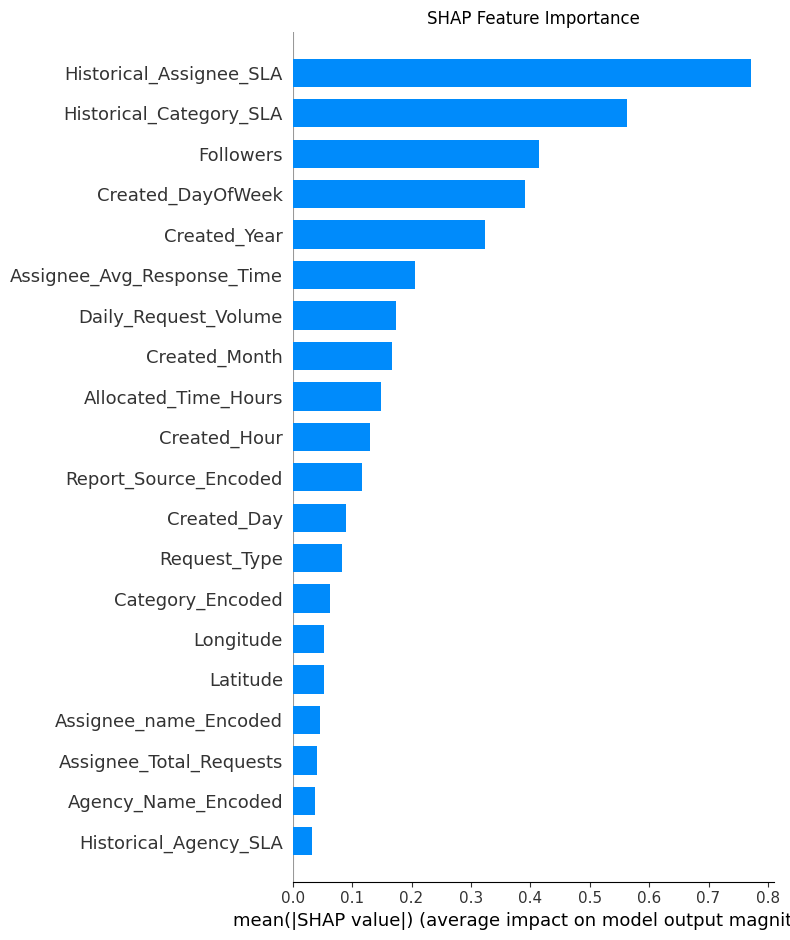

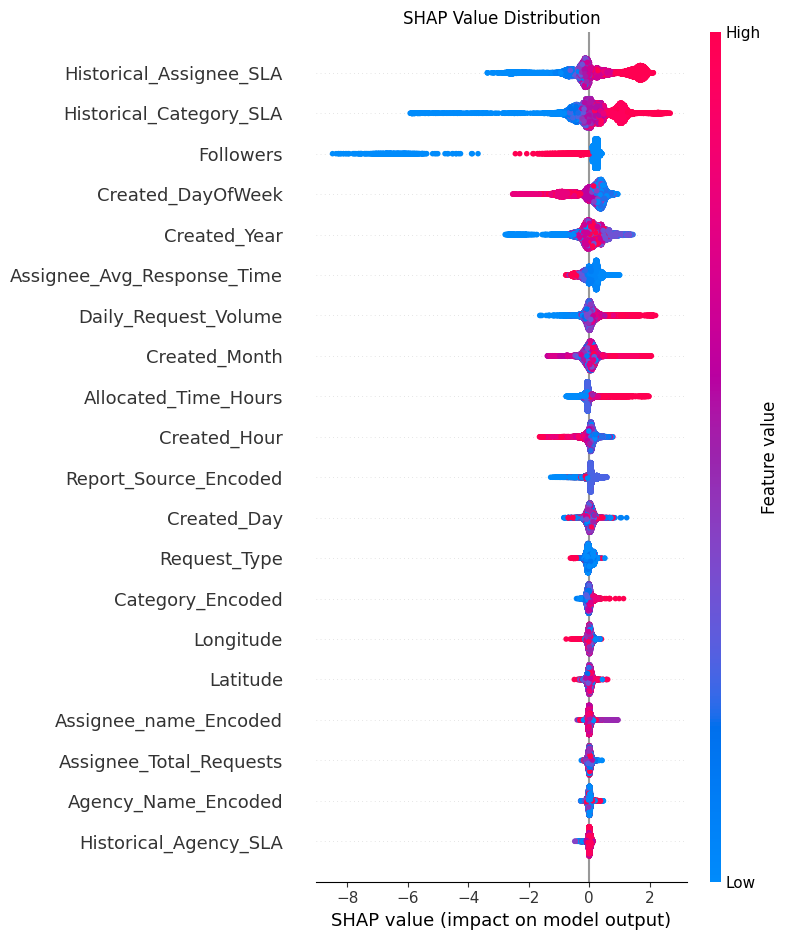


Feature Importance based on SHAP values:
                       feature  importance  absolute_importance
13     Historical_Assignee_SLA    0.771296             0.771296
11     Historical_Category_SLA    0.562766             0.562766
20                   Followers    0.414744             0.414744
8            Created_DayOfWeek    0.390300             0.390300
7                 Created_Year    0.323780             0.323780
14  Assignee_Avg_Response_Time    0.205253             0.205253
10        Daily_Request_Volume    0.173848             0.173848
6                Created_Month    0.167908             0.167908
16        Allocated_Time_Hours    0.149283             0.149283
4                 Created_Hour    0.129925             0.129925
2        Report_Source_Encoded    0.116899             0.116899
5                  Created_Day    0.090040             0.090040
19                Request_Type    0.082491             0.082491
1             Category_Encoded    0.062871             0.06287

<Figure size 1000x600 with 0 Axes>

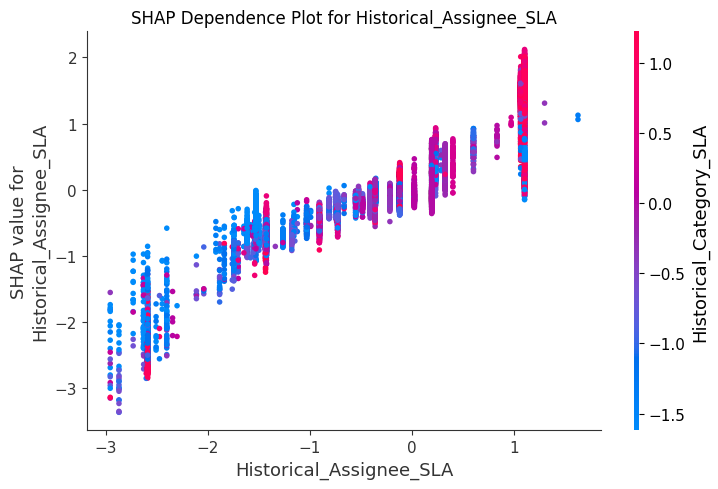

<Figure size 1000x600 with 0 Axes>

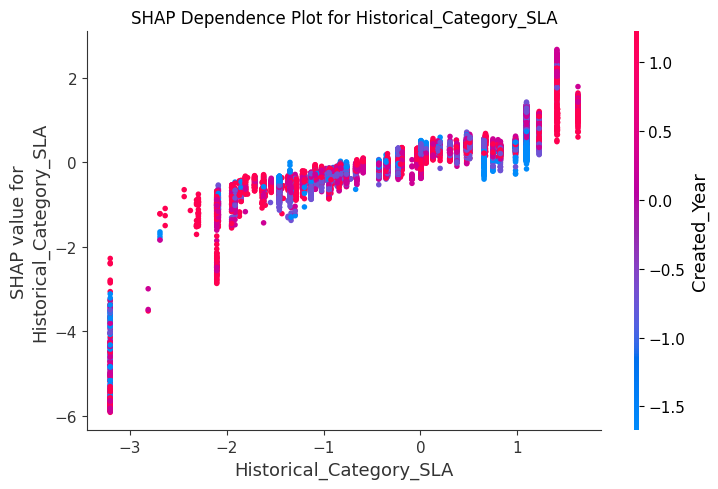

<Figure size 1000x600 with 0 Axes>

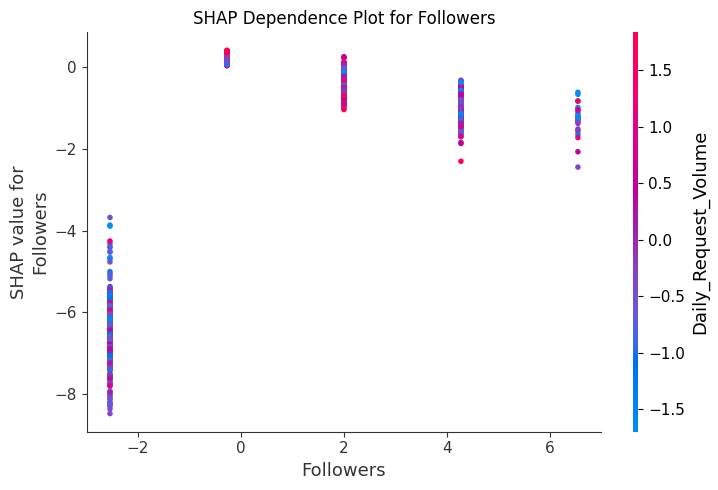

<Figure size 1000x600 with 0 Axes>

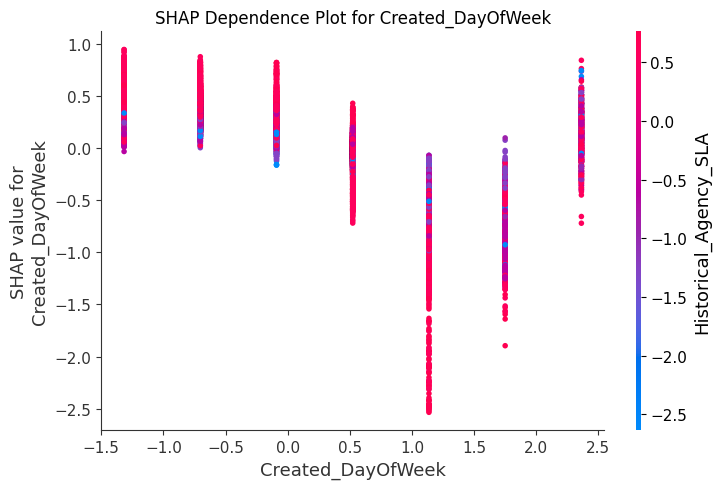

<Figure size 1000x600 with 0 Axes>

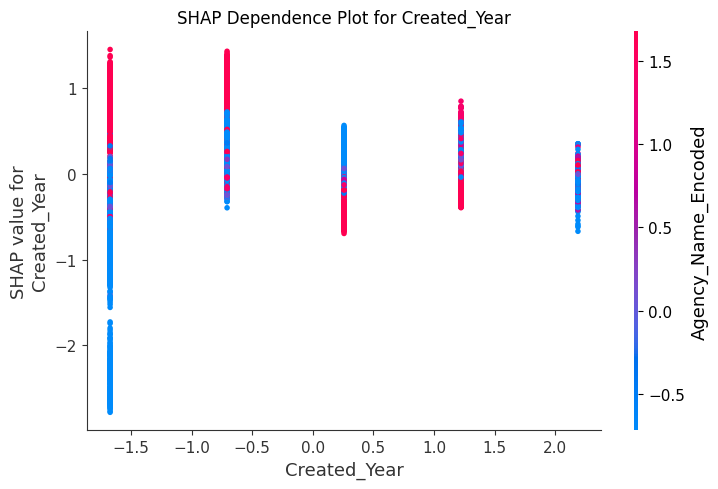


Top 10 Feature Interactions:
                   Feature 1                   Feature 2  Interaction Strength
210  Historical_Category_SLA     Historical_Assignee_SLA              0.556851
168        Created_DayOfWeek     Historical_Assignee_SLA              0.301452
152             Created_Year     Historical_Assignee_SLA              0.294982
240  Historical_Assignee_SLA                   Followers              0.239521
234  Historical_Assignee_SLA  Assignee_Avg_Response_Time              0.212164
166        Created_DayOfWeek     Historical_Category_SLA              0.203725
217  Historical_Category_SLA                   Followers              0.179162
150             Created_Year     Historical_Category_SLA              0.176307
135            Created_Month     Historical_Assignee_SLA              0.147670
197     Daily_Request_Volume     Historical_Assignee_SLA              0.138857

Average Feature Impact on Predictions:
                       feature  positive_impact  negative_imp

In [17]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# If shap_values is a list (for binary classification), take the values for class 1
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

# Create summary dot plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Value Distribution")
plt.tight_layout()
plt.show()

# Calculate and display average absolute SHAP values
shap_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': np.abs(shap_values).mean(0),
    'absolute_importance': np.abs(shap_values).mean(0)
})
shap_importance_df = shap_importance_df.sort_values('importance', ascending=False)

print("\nFeature Importance based on SHAP values:")
print(shap_importance_df)

# Create dependence plots for top 5 features
top_features = shap_importance_df['feature'].head(5).values
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values, X_test, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.tight_layout()
    plt.show()

# Calculate and display feature interactions
feature_interactions = {}
for i, feature1 in enumerate(X_test.columns):
    for j, feature2 in enumerate(X_test.columns):
        if i < j:
            interaction = np.abs(np.array([
                [shap_values[k, i] * shap_values[k, j] for k in range(len(shap_values))]
            ])).mean()
            feature_interactions[(feature1, feature2)] = interaction

# Sort interactions and display top 10
interaction_df = pd.DataFrame([
    {'Feature 1': f1, 'Feature 2': f2, 'Interaction Strength': v}
    for (f1, f2), v in feature_interactions.items()
])
interaction_df = interaction_df.sort_values('Interaction Strength', ascending=False)

print("\nTop 10 Feature Interactions:")
print(interaction_df.head(10))


# Calculate average impact on predictions
avg_impact = pd.DataFrame({
    'feature': X_test.columns,
    'positive_impact': np.where(shap_values > 0, shap_values, 0).mean(0),
    'negative_impact': np.where(shap_values < 0, shap_values, 0).mean(0)
})
avg_impact = avg_impact.sort_values('positive_impact', ascending=False)

print("\nAverage Feature Impact on Predictions:")
print(avg_impact)


In [21]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure we're using the same analysis folder
analysis_folder = 'Compliance Analysis'
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# If shap_values is a list (for binary classification), take the values for class 1
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create and save summary bar plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'shap_feature_importance.png'))
plt.close()

# Create and save summary dot plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Value Distribution")
plt.tight_layout()
plt.savefig(os.path.join(analysis_folder, 'shap_value_distribution.png'))
plt.close()

# Calculate SHAP importance
shap_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': np.abs(shap_values).mean(0),
    'absolute_importance': np.abs(shap_values).mean(0)
})
shap_importance_df = shap_importance_df.sort_values('importance', ascending=False)

# Create and save dependence plots for top 5 features
top_features = shap_importance_df['feature'].head(5).values
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values, X_test, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.tight_layout()
    plt.savefig(os.path.join(analysis_folder, f'shap_dependence_{feature.replace(" ", "_")}.png'))
    plt.close()

# Calculate feature interactions
feature_interactions = {}
for i, feature1 in enumerate(X_test.columns):
    for j, feature2 in enumerate(X_test.columns):
        if i < j:
            interaction = np.abs(np.array([
                [shap_values[k, i] * shap_values[k, j] for k in range(len(shap_values))]
            ])).mean()
            feature_interactions[(feature1, feature2)] = interaction

# Create interaction DataFrame
interaction_df = pd.DataFrame([
    {'Feature 1': f1, 'Feature 2': f2, 'Interaction Strength': v}
    for (f1, f2), v in feature_interactions.items()
])
interaction_df = interaction_df.sort_values('Interaction Strength', ascending=False)

# Calculate average impact
avg_impact = pd.DataFrame({
    'feature': X_test.columns,
    'positive_impact': np.where(shap_values > 0, shap_values, 0).mean(0),
    'negative_impact': np.abs(np.where(shap_values < 0, shap_values, 0)).mean(0)
})
avg_impact = avg_impact.sort_values('positive_impact', ascending=False)

# Save SHAP analysis results to text file
with open(os.path.join(analysis_folder, 'shap_analysis_results.txt'), 'w') as f:
    f.write("SHAP Analysis Results\n")
    f.write("=" * 50 + "\n\n")
    
    f.write("1. Feature Importance based on SHAP values\n")
    f.write("-" * 40 + "\n")
    f.write(shap_importance_df.to_string())
    
    f.write("\n\n2. Top 10 Feature Interactions\n")
    f.write("-" * 40 + "\n")
    f.write(interaction_df.head(10).to_string())
    
    f.write("\n\n3. Average Feature Impact on Predictions\n")
    f.write("-" * 40 + "\n")
    f.write(avg_impact.to_string())

# Save detailed DataFrames to CSV files
shap_importance_df.to_csv(os.path.join(analysis_folder, 'shap_feature_importance.csv'), index=False)
interaction_df.to_csv(os.path.join(analysis_folder, 'shap_feature_interactions.csv'), index=False)
avg_impact.to_csv(os.path.join(analysis_folder, 'shap_feature_impact.csv'), index=False)

print("\nSHAP Analysis completed! Files saved in 'Compliance Analysis' folder:")
print("1. shap_feature_importance.png - SHAP feature importance bar plot")
print("2. shap_value_distribution.png - SHAP value distribution plot")
print("3. shap_dependence_*.png - SHAP dependence plots for top 5 features")
print("4. shap_analysis_results.txt - Detailed SHAP analysis results")
print("5. shap_feature_importance.csv - Feature importance data")
print("6. shap_feature_interactions.csv - Feature interactions data")
print("7. shap_feature_impact.csv - Feature impact data")


SHAP Analysis completed! Files saved in 'Compliance Analysis' folder:
1. shap_feature_importance.png - SHAP feature importance bar plot
2. shap_value_distribution.png - SHAP value distribution plot
3. shap_dependence_*.png - SHAP dependence plots for top 5 features
4. shap_analysis_results.txt - Detailed SHAP analysis results
5. shap_feature_importance.csv - Feature importance data
6. shap_feature_interactions.csv - Feature interactions data
7. shap_feature_impact.csv - Feature impact data


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>